# Clasificación de Documentos con Scikit-learn y MLflow

## Cargar los datos

Primero debemos tener las bibliotecas necesarias instladas (`scikit-learn`, `matplotlib`, `numpy`, y `pandas`). Si no están instalados, podemos hacerlo utilizando pip:

In [ ]:
# pip install scikit-learn matplotlib numpy pandas

In [2]:
!ls  # verificamos que requirements_ejercicio1.txt y utils.py se han cargado correctamente

__pycache__  requirements_ejercicio1.txt  sample_data  utils.py


Importar librería necesarias

In [1]:
!pip install -r requirements_ejercicio1.txt

In [3]:
import utils

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

Elegimos el dataset `fetch_20newsgroups` de Scikit-learn:

In [5]:
categories = fetch_20newsgroups(subset='all').target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
categories = ['alt.atheism', 'rec.sport.baseball', 'comp.graphics', 'sci.space', 'sci.med']   # Elegimos estas categorías para la práctica
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

data = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})

In [8]:
data.shape

(2848, 2)

### Análisis Exploratorio de Datos (EDA)

In [7]:
data.head()

,text,target
0,\nYou can probably get this information by cal...,3
1,\nYou are making precisely one of the points I...,3
2,\nI could give much the same testimonial about...,0
3,"\n \nNo, the argument says John has known Q, ...",0
4,\nWas that post for real? I thought it was a l...,4


In [8]:
data.info() # Información básica del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2848 non-null   object
 1   target  2848 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.6+ KB


In [25]:
# Verificando valores faltantes
utils.check_missing_values(data)

Valores faltantes en cada columna:
text      0
target    0
dtype: int64


In [11]:
print(f"Categorías únicas: {data['target'].nunique()}")

Categorías únicas: 5


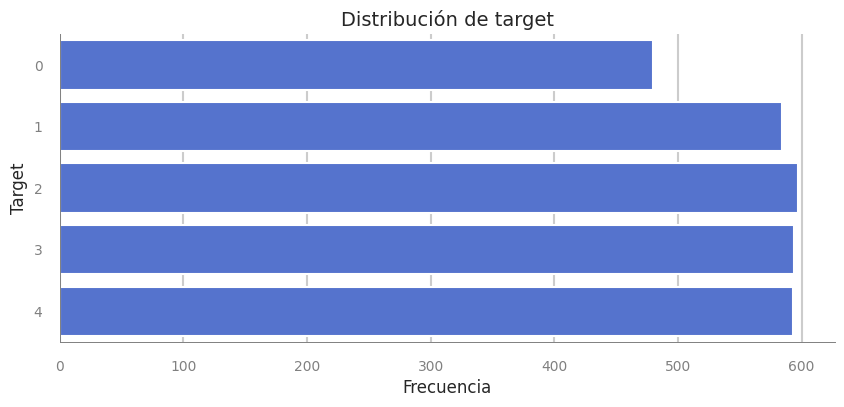

In [7]:
# Visualización de la distribución de las categorías
utils.plot_category_distribution(data, 'target')

In [8]:
# Calcula la longitud del texto y añade la nueva columna
utils.calculate_text_length(data)

In [10]:
data.head(10)

,text,target,text_length
0,\nYou can probably get this information by cal...,3,669
1,\nYou are making precisely one of the points I...,3,2114
2,\nI could give much the same testimonial about...,0,784
3,"\n \nNo, the argument says John has known Q, ...",0,1342
4,\nWas that post for real? I thought it was a l...,4,145
5,\n\n,4,2
6,\nThe National Air & Space Museum has both the...,4,174
7,,3,1
8,"\nI've gotten migraines after exercise, though...",3,122
9,"Piper lived in my town (Williamsport, PA) when...",4,728


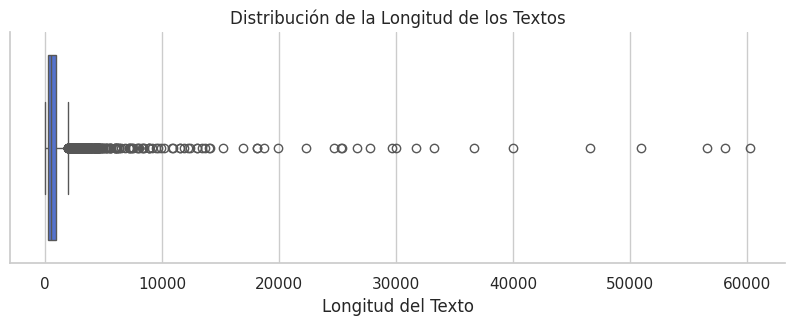

In [11]:
# Visualiza la distribución de la longitud del texto
utils.plot_text_length_distribution(data)

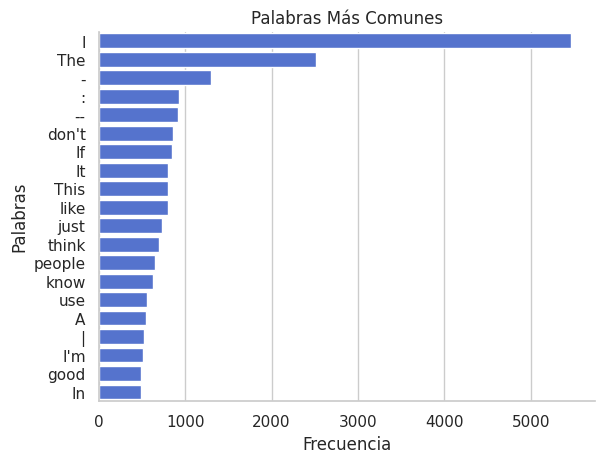

In [12]:
# Obtiene las palabras más comunes y visualízalas
common_words = utils.get_most_common_words(data)
utils.plot_most_common_words(common_words)

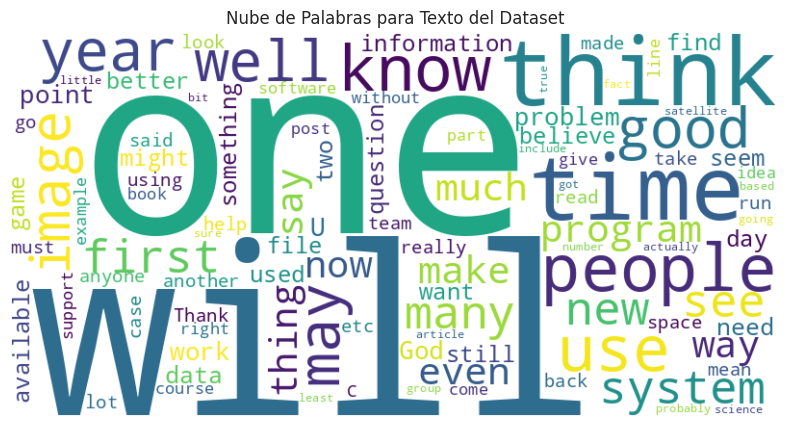

In [13]:
# Genera y visualiza una nube de palabras
text_to_visualize = ' '.join(data['text'])
utils.generate_wordcloud(text_to_visualize)

In [15]:
texts = data['text'].tolist()
texts[:5]

['\nYou can probably get this information by calling your public health\ndepartment in your county (in Pittsburgh, they give the shots free,\nas well).  There are bulletins in medical libraries that give\nrecommendations, or you could call the infectious diseases section\nof the medicine department of your local medical school.  You also\nwill probably want to talk about Malaria prophylaxis.  You will\nneed your doctor to get the prescription.  \n-- \n----------------------------------------------------------------------------\nGordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and\ngeb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." ',
 "\nYou are making precisely one of the points I wanted to make.\nI fully agree with you that there is a big distinction between the\n*process* of science and the end result.  \n\nAs an end result of science, one wants to get results that are\nobjectively verifiable.  But there is nothing objective about the\n*pro

In [16]:
utils.vocabulary_diversity(texts)

Vocabulario total: 460216, Vocabulario único: 26907, Diversidad de vocabulario: 0.058466024649295116


In [17]:
utils.term_frequency(texts, 'health')
utils.term_frequency(texts, 'scientist')
utils.term_frequency(texts, 'sport')
utils.term_frequency(texts, 'machine')
utils.term_frequency(texts, 'learning')
utils.term_frequency(texts, 'machine learning')
utils.term_frequency(texts, 'tech')

El término 'health' aparece 264 veces.
El término 'scientist' aparece 87 veces.
El término 'sport' aparece 92 veces.
El término 'machine' aparece 135 veces.
El término 'learning' aparece 39 veces.
El término 'machine learning' aparece 2 veces.
El término 'tech' aparece 480 veces.


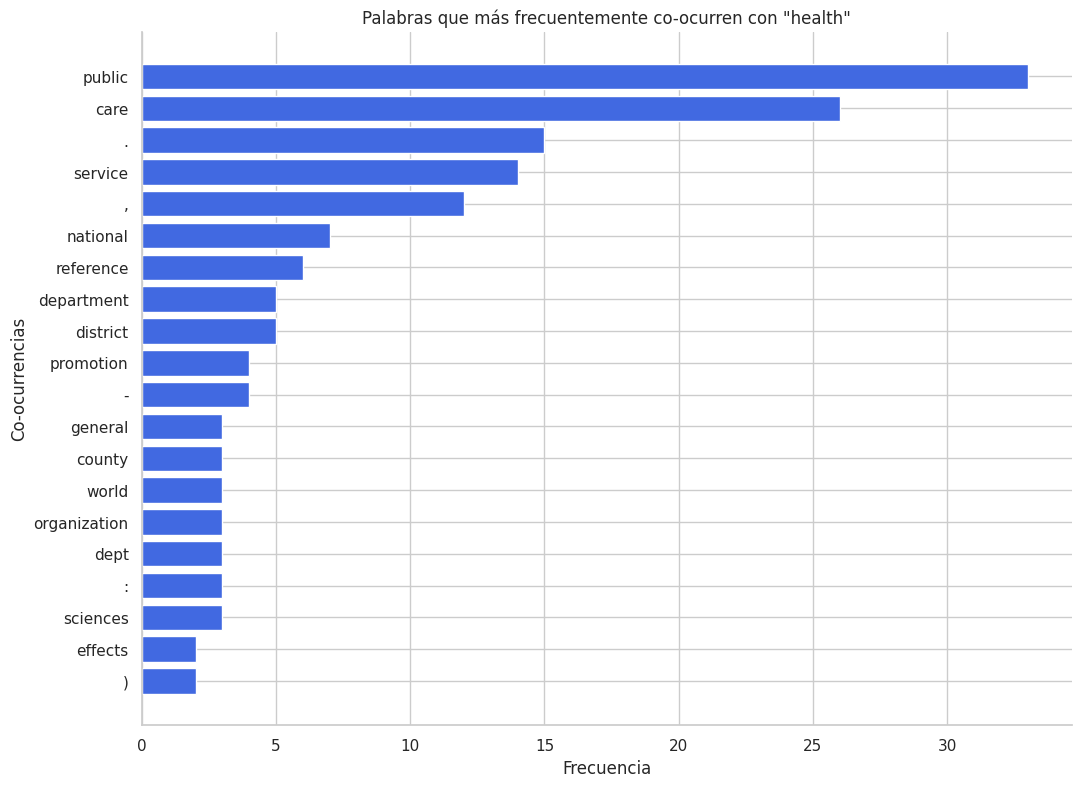

In [33]:
utils.plot_word_co_occurrence(texts, 'health')

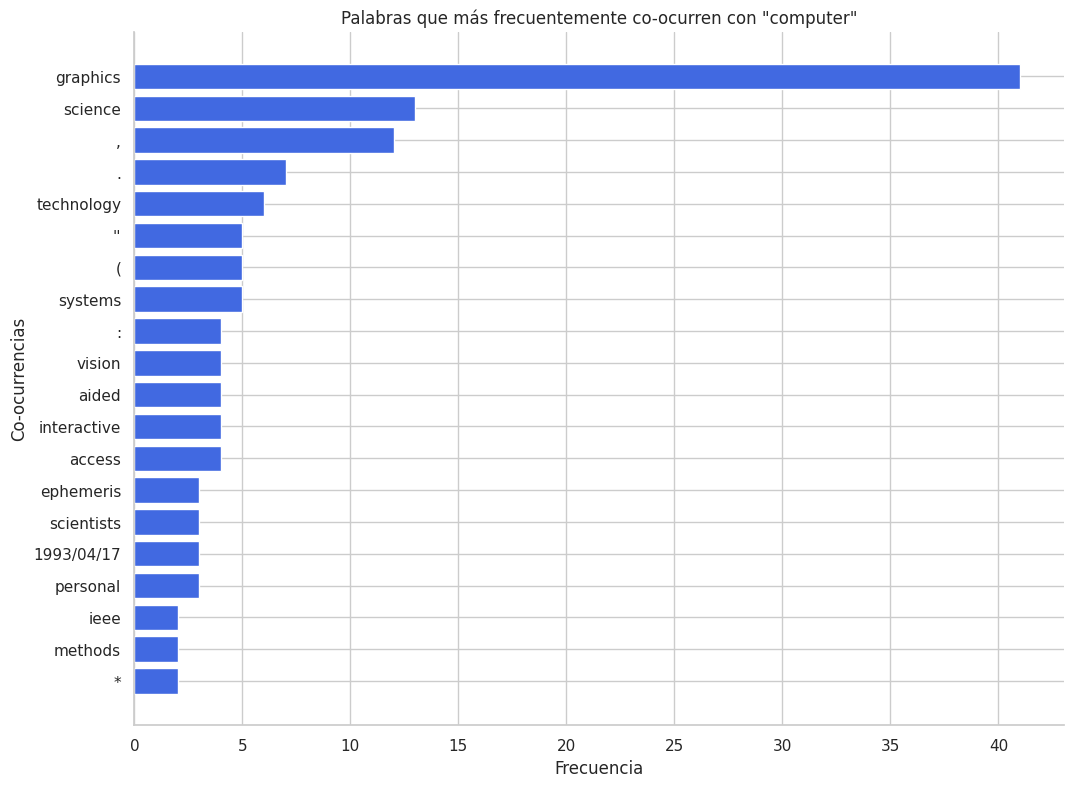

In [36]:
utilsplot_word_co_occurrence(texts, 'computer')

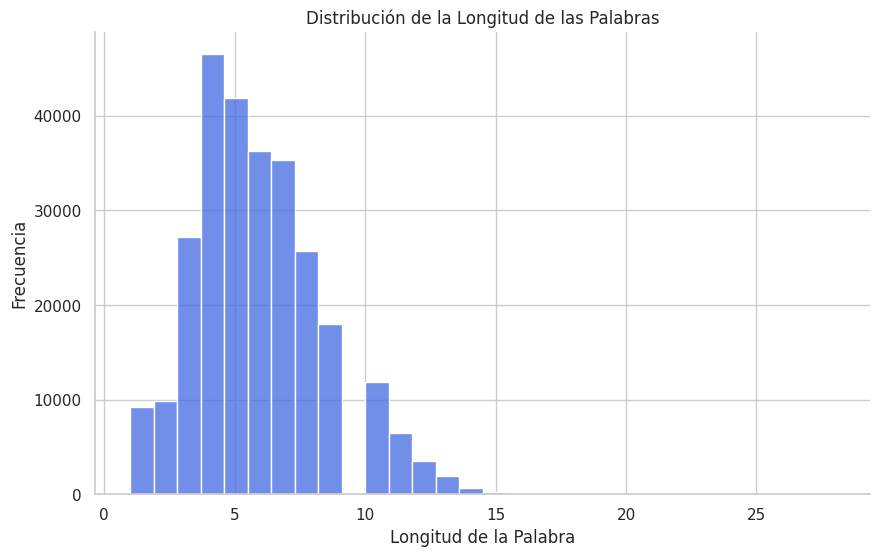

In [37]:
utils.plot_word_length_distribution(texts)

In [38]:
utils.common_ngrams(texts)

('of', 'the'): 2649
('in', 'the'): 1742
('to', 'the'): 901
('on', 'the'): 818
('to', 'be'): 776
('is', 'a'): 721
('for', 'the'): 665
('it', 'is'): 630
('that', 'the'): 539
('and', 'the'): 537
('is', 'the'): 504
('I', 'have'): 444
('in', 'a'): 440
('of', 'a'): 438
('from', 'the'): 417
('with', 'the'): 405
('will', 'be'): 397
('is', 'not'): 384
('I', "don't"): 378
('for', 'a'): 375


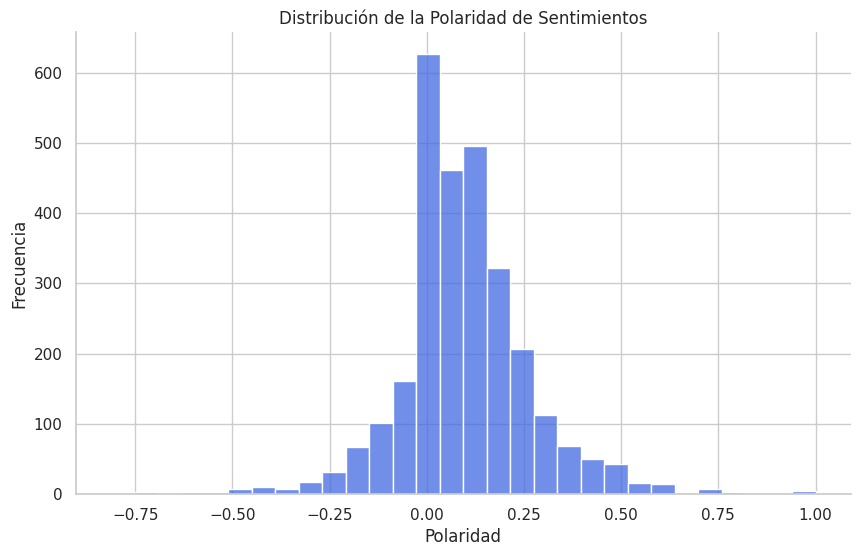

In [39]:
utils.sentiment_analysis(texts)

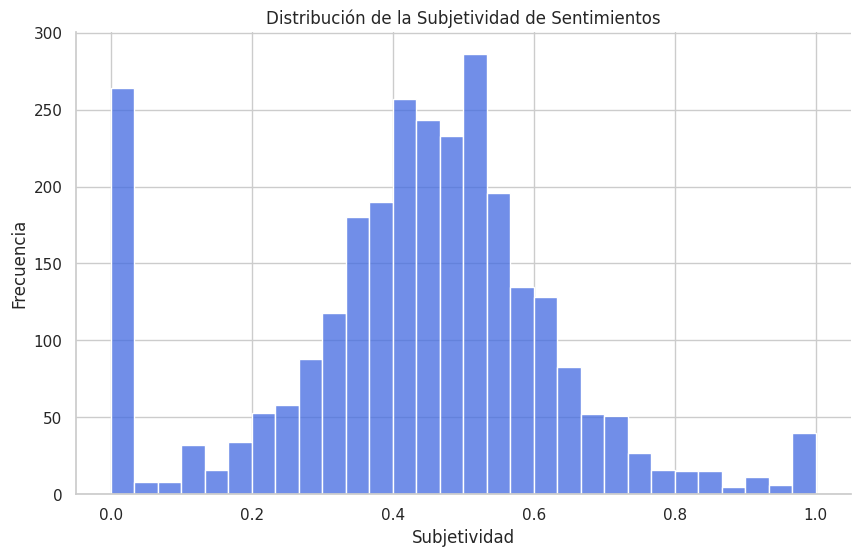

In [46]:
utils.sentiment_analysis_sub(texts)

La propiedad de sentimiento devuelve una tupla de la forma Sentimiento(polaridad - `polarity`, subjetividad - `subjectivity`). La puntuación de **polaridad** es un número decimal dentro del rango `[-1.0, 1.0]`. La **subjetividad** es un número decimal dentro del rango `[0.0, 1.0]` donde `0.0` es muy objetivo y `1.0` es muy subjetivo.

In [47]:
utils.lda_topic_modeling(texts)

Top términos en el tema #0: ['not', 'you', 'it', 'in', 'that', 'and', 'is', 'of', 'to', 'the']
Top términos en el tema #1: ['n3jxp', 'chastity', 'skepticism', 'intellect', 'geb', 'pitt', 'gordon', 'banks', 'com', 'edu']
Top términos en el tema #2: ['for', '01', '03', 'and', '02', 'nasa', 'graphics', '00', 'space', 'edu']
Top términos en el tema #3: ['with', 'be', 'on', 'is', 'for', 'in', 'to', 'of', 'and', 'the']
Top términos en el tema #4: ['24', 'images', 'color', 'files', 'format', 'you', 'gif', 'image', 'file', 'jpeg']


In [48]:
utils.find_collocations(texts)

Top 20 collocations: [("'Brave", 'Woofers'), ("'Compacte", "Objecten'"), ("'Ray", "Tracers'"), ("'Stros", 'swiped'), ("'cell", 'globule'), ("'compacte", 'objecten'), ("'engineering", 'practicies'), ("'light", "fascists'"), ("'search-and-", 'destroy-missions'), ("'self", 'injector'), ("'started", "off'"), ("+'", 'Removed'), ('+04:10', 'Fairing'), ('+22:36', 'Cyclade'), ('+Athena', 'Plotter'), ('-227-9000', 'SPACEHAB'), ('-320-7016', '9-5'), ('-433-4000', 'Aircraft/Rocket'), ('-497-1201', 'scdinfo'), ('-666-1541', 'TIDES')]


### Conclusiones

1. **Desbalance de Clases:** Existe un pequeño desbalance en la distribución de la variable 'target', lo que sugiere la necesidad de estrategias de balanceo durante el preprocesamiento y entrenamiento del modelo.

2. **Longitud y Diversidad del Texto:** Hay outliers en la longitud del texto, con algunos extremadamente largos, y un índice de diversidad de vocabulario bajo (5.8%), indicando el uso de una terminología limitada y la presencia de muchas palabras comunes.

3. **Limpieza de Datos Necesaria:** Las palabras más comunes y las collocations carecen de coherencia temática y contienen muchas palabras de parada y conectores, lo que señala la necesidad de limpieza de texto, eliminación de palabras de parada y posiblemente puntuación.

4. **Análisis de N-Gramas y Sentimiento:** Los n-gramas comunes muestran un uso frecuente de preposiciones y artículos, con ciertos bigramas reflejando narrativa en primera persona. La polaridad del sentimiento generalmente neutra a positiva y una amplia gama de subjetividad en los textos sugieren la presencia de opiniones personales y narrativas.

5. **Temas y Especificidad:** Los términos específicos del dominio y los números señalan la presencia de contenidos relacionados con salud, ciencia y posibles referencias a estudios o datos estadísticos. Las palabras dominantes en el modelado de temas no contribuyen a la distinción clara de los temas, lo que implica que es necesario un preprocesamiento más sofisticado para resaltar términos significativos.


El preprocesamiento debe enfocarse en la normalización del texto, incluyendo la eliminación de palabras de parada, puntuación y posiblemente el equilibrio de clases, así como la incorporación de análisis más profundos para resaltar la terminología técnica y los temas relevantes dentro del corpus.